In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_DS.csv')

In [3]:
df

,Year,4,5,6
0,1957,3.7,3.8,6.7
1,1958,3.5,3.2,5.9
2,1959,2.4,3.2,5.2
3,1960,2.6,3.5,4.8
4,1961,2.6,3.4,4.4
5,1962,3.6,5.5,4.8
6,1963,3.0,2.7,5.4
7,1964,2.4,3.2,5.6
8,1965,2.5,4.0,5.4
9,1966,3.3,4.5,5.5


### Проверка гипотезы о нормальном распределении генеральной совокупности по критерию Пирсона

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

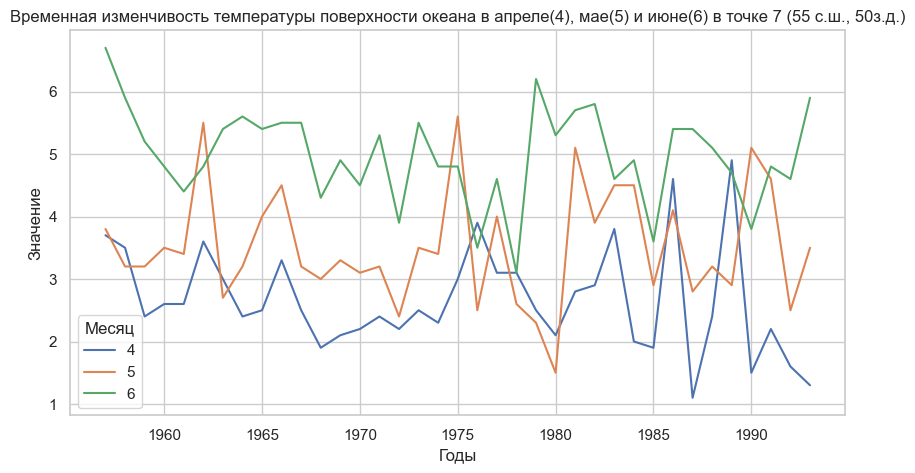

In [5]:
sns.set(style="whitegrid")

df_melted = df.melt(id_vars='Year', var_name='Month', value_name='Value')

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted, x='Year', y='Value', hue='Month')

plt.title('Временная изменчивость температуры поверхности океана в апреле(4), мае(5) и июне(6) в точке 7 (55 с.ш., 50з.д.)')
plt.xlabel('Годы')
plt.ylabel('Значение')
plt.legend(title='Месяц')
plt.show()

 для ***апреля*** проверить гипотезу о нормальном распределении генеральной совокупности по критерию Пирсона 

Число интервалов N определить по формуле Стерджеса: N = 1 + [3,322 lgn ] = 1 + [log2n]

In [6]:
df.shape

(37, 4)

In [7]:
import numpy as np

#минимальное и максимальное значения
xmin = df['4'].min()
xmax = df['4'].max()

#размах (диапазон) выборки
R = xmax-xmin

#количество интервалов по формуле Стерджеса
n = len(df)
N = round(1 + 3.322 * np.log10(n))

#величина интервала
h = (xmax - xmin) / N

#границы интервалов
intervals = [(xmin + i * h, xmin + (i + 1) * h) for i in range(N)]

#абсолютные частоты
absolute_frequencies = []
for interval in intervals:
    count = df[(df['4'] >= interval[0]) & (df['4'] < interval[1])].shape[0]
    absolute_frequencies.append(count)

#относительные частоты
relative_frequencies = [f / n for f in absolute_frequencies]

#середины интервалов
midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]

#выполнение условий нормировки для абсолютных и относительных частот
absolute_sum = sum(absolute_frequencies)
relative_sum = sum(relative_frequencies)

result_df = pd.DataFrame({
    'Интервал': [f'({interval[0]:.2f}, {interval[1]:.2f})' for interval in intervals],
    'Абсолютная частота (mi)': absolute_frequencies,
    'Относительная частота (wi)': relative_frequencies,
    'Середина интервала (xi)': midpoints
})

print(f'Минимальное значение: {xmin}')
print(f'Максимальное значение: {xmax}')
print(f'Размах (диапазон) выборки: {R:.1f}')
print(f'Количество интервалов по формуле Стерджеса: {N}')
print(f'Величина интервала {h:.2f}')
print(f'\nСумма абсолютных частот: {absolute_sum}')
print(f'Сумма относительных частот: {relative_sum:.4f}')
result_df

Минимальное значение: 1.1
Максимальное значение: 4.9
Размах (диапазон) выборки: 3.8
Количество интервалов по формуле Стерджеса: 6
Величина интервала 0.63

Сумма абсолютных частот: 36
Сумма относительных частот: 0.9730


,Интервал,Абсолютная частота (mi),Относительная частота (wi),Середина интервала (xi)
0,"(1.10, 1.73)",4,0.108108,1.416667
1,"(1.73, 2.37)",9,0.243243,2.050000
2,"(2.37, 3.00)",14,0.378378,2.683333
3,"(3.00, 3.63)",5,0.135135,3.316667
4,"(3.63, 4.27)",3,0.081081,3.950000
5,"(4.27, 4.90)",1,0.027027,4.583333


По имеющемуся интервальному вариационному ряду с помощью построить гистограмму и полигон распределения абсолютных частот.

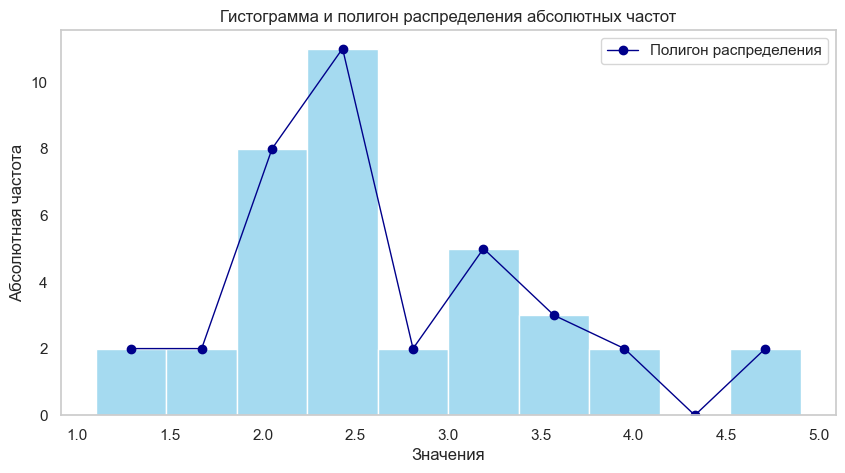

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['4'], bins=10, kde=False, color='skyblue', stat='count')


n, bins = np.histogram(df['4'], bins=10)
midpoints = 0.5 * (bins[1:] + bins[:-1])

plt.plot(midpoints, n, marker='o', color='darkblue', label='Полигон распределения', linewidth=1)

plt.title('Гистограмма и полигон распределения абсолютных частот')
plt.xlabel('Значения')
plt.ylabel('Абсолютная частота')
plt.legend()
plt.grid()

plt.show()

Полигон распределения — это график, который показывает распределение абсолютных частот в виде линии, соединяющей середины интервалов.

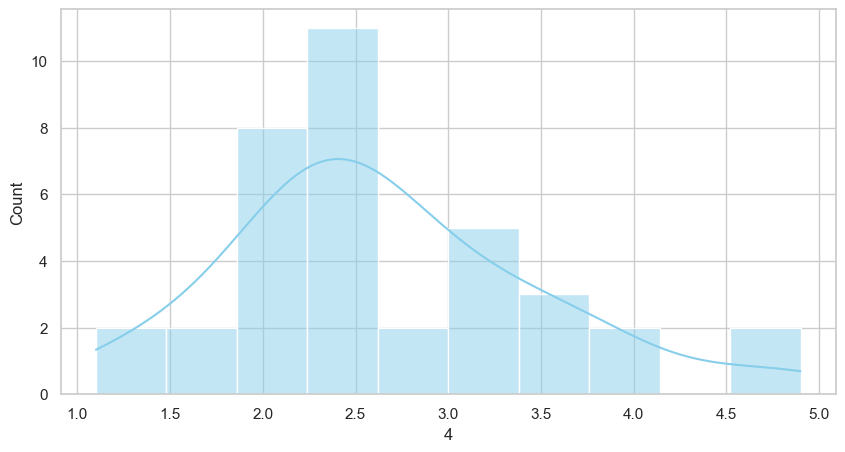

In [9]:
plt.figure(figsize = (10,5))
sns.histplot(df['4'], bins = 10, kde = True, color = 'skyblue', stat = 'count')
plt.show()

In [10]:
data = {
    'Интервал': ['(1.10, 1.73)', '(1.73, 2.37)', '(2.37, 3.00)', 
                 '(3.00, 3.63)', '(3.63, 4.27)', '(4.27, 4.90)'],
    'Абсолютная частота (mi)': [4, 9, 14, 5, 3, 1],
    'Середина интервала (xi)': [1.416667, 2.050000, 2.683333, 
                                 3.316667, 3.950000, 4.583333]
}

df_by_parts = pd.DataFrame(data)

n = df_by_parts['Абсолютная частота (mi)'].sum()

#выборочное среднее
x_mean = (df_by_parts['Абсолютная частота (mi)'] * df_by_parts['Середина интервала (xi)']).sum() / n

#выборочное среднее квадратическое отклонение
S_n = np.sqrt(((df_by_parts['Абсолютная частота (mi)'] * (df_by_parts['Середина интервала (xi)'] - x_mean) ** 2).sum()) / n)

print(f'Выборочное среднее x: {x_mean:.4f}')
print(f'Выборочное среднее квадратическое отклонение Sn: {S_n:.4f}')

Выборочное среднее x: 2.6306
Выборочное среднее квадратическое отклонение Sn: 0.7520


In [11]:
#переход к нормированным величинам
a_i = [1.10, 1.73, 2.37, 3.00, 3.63, 4.27]
a_i1 = [1.73, 2.37, 3.00, 3.63, 4.27, 4.90]

#вычисление нормированных величин
z_i = [round((a - x_mean) / S_n, 2) for a in a_i]
z_i1 = [round((a- x_mean) / S_n, 2) for a in a_i1]
z1 = -np.inf
zN_plus_1 = np.inf

z_values = [z1] + z_i[1:]
z_i1_values = z_i1[:-1] + [zN_plus_1] 
a_i_values = a_i
a_i1_values = a_i1

df_by_parts['ai'] = a_i_values
df_by_parts['ai+1'] = a_i1_values
df_by_parts['zi'] = z_values
df_by_parts['zi+1'] = z_i1_values

In [12]:
df_by_parts

,Интервал,Абсолютная частота (mi),Середина интервала (xi),ai,ai+1,zi,zi+1
0,"(1.10, 1.73)",4,1.416667,1.10,1.73,-inf,-1.20
1,"(1.73, 2.37)",9,2.050000,1.73,2.37,-1.20,-0.35
2,"(2.37, 3.00)",14,2.683333,2.37,3.00,-0.35,0.49
3,"(3.00, 3.63)",5,3.316667,3.00,3.63,0.49,1.33
4,"(3.63, 4.27)",3,3.950000,3.63,4.27,1.33,2.18
5,"(4.27, 4.90)",1,4.583333,4.27,4.90,2.18,inf


In [13]:
from scipy.stats import norm
#Ф0(–z) = – Ф0(z)
phi_values = {
    -np.inf: -0.5,
    -1.20: -0.3849,
    -0.35: -0.1368,
    0.49: 0.1879,
    1.33: 0.4082,
    2.18: 0.4854,
    np.inf: 0.5
}


phi_z_i = [-0.5, -0.3849, -0.1368, 0.1879, 0.4082, 0.4854]
phi_z_i1 = [-0.3849, -0.1368, 0.1879, 0.4082, 0.4854, 0.5] 

#вычисление вероятностей P_i
P_i = [phi_z_i1[i] - phi_z_i[i] for i in range(len(z_i))]

#вычисление теоретических частот
mi_prime = [n * p for p in P_i]

df_by_parts['Φ0(zi)'] = phi_z_i
df_by_parts['Φ0(zi+1)'] = phi_z_i1
df_by_parts['Pi'] = P_i
df_by_parts['mi\''] = mi_prime

print(df_by_parts[['Интервал', 'zi', 'zi+1', 'Φ0(zi)', 'Φ0(zi+1)', 'Pi', 'mi\'']])

       Интервал    zi  zi+1  Φ0(zi)  Φ0(zi+1)      Pi      mi'
0  (1.10, 1.73)  -inf -1.20 -0.5000   -0.3849  0.1151   4.1436
1  (1.73, 2.37) -1.20 -0.35 -0.3849   -0.1368  0.2481   8.9316
2  (2.37, 3.00) -0.35  0.49 -0.1368    0.1879  0.3247  11.6892
3  (3.00, 3.63)  0.49  1.33  0.1879    0.4082  0.2203   7.9308
4  (3.63, 4.27)  1.33  2.18  0.4082    0.4854  0.0772   2.7792
5  (4.27, 4.90)  2.18   inf  0.4854    0.5000  0.0146   0.5256


In [14]:
data = {
    'Интервал': ['(1.10, 2.37)', '(2.37, 3.00)', '(3.00, 3.63)', '(3.63, 4.90)'],
    'zi': [-float('inf'), -0.35, 0.49, 1.33],
    'zi+1': [-0.35, 0.49, 1.33, float('inf')],
    'Φ0(zi)': [-0.5000, -0.1368, 0.1879, 0.4082],
    'Φ0(zi+1)': [-0.1368, 0.1879, 0.4082, 0.5000],
    'Pi': [0.3632, 0.3247, 0.2203, 0.0918],
    'mi\'': [13.4384, 12.0139, 8.1511, 3.3966],
    'mi': [13, 14, 5, 4]
}

df_try = pd.DataFrame(data)
k = 1

print(f"\nЧисло степеней свободы k = {k}")


Число степеней свободы k = 1


In [15]:
from scipy.stats import chi2

df_try['(mi - mi\')² / mi\''] = (df_try['mi'] - df_try['mi\'']) ** 2 / df_try['mi\'']  # Пересчитываем χ²
chi_squared_nabl = df_try['(mi - mi\')² / mi\''].sum()

k = 1

#уровень значимости α1
alpha_1 = 0.025
critical_value_1 = chi2.ppf(1 - alpha_1, k)
#уровень значимости α2
alpha_2 = 0.01
critical_value_2 = chi2.ppf(1 - alpha_2, k)

print(f"Наблюдаемое значение χ²: {chi_squared_nabl}")
print(f"Критическая точка χ²1(α={alpha_1}; k={k}): {critical_value_1}")
print(f"Критическая точка χ²2(α={alpha_2}; k={k}): {critical_value_2}")
df_try

Наблюдаемое значение χ²: 1.6680013196399037
Критическая точка χ²1(α=0.025; k=1): 5.02388618731489
Критическая точка χ²2(α=0.01; k=1): 6.634896601021215


,Интервал,zi,zi+1,Φ0(zi),Φ0(zi+1),Pi,mi',mi,(mi - mi')² / mi'
0,"(1.10, 2.37)",-inf,-0.35,-0.5000,-0.1368,0.3632,13.4384,13,0.014302
1,"(2.37, 3.00)",-0.35,0.49,-0.1368,0.1879,0.3247,12.0139,14,0.328336
2,"(3.00, 3.63)",0.49,1.33,0.1879,0.4082,0.2203,8.1511,5,1.218171
3,"(3.63, 4.90)",1.33,inf,0.4082,0.5000,0.0918,3.3966,4,0.107193


In [16]:
#набл < кр, то нет оснований отвергнуть гипотезу о нормальном распределении генеральной совокупности.

In [17]:
#для отчета вывод в определенном ФОРМАТЕ
stats_data = {
    'Объем выборки (n)': [37],
    'Минимальное значение (xmin)': [1.1],
    'Максимальное значение (xmax)': [4.9],
    'Размах (R)': [3.8],
    'Число интервалов (N)': [6],
    'Величина интервалов (h)': [0.63],
    'Выборочное среднее (x)': [2.6306],
    'Выборочное среднеквадратическое отклонение (S_n)': [0.7520],
    'χ²набл': [1.668],
    'Число степеней свободы (k)': [1],
    'Первый уровень значимости (α1)': [0.025],
    'χ²кр(α1; k)': [5.024],
    'Второй уровень значимости (α2)': [0.01],
    'χ²кр(α2; k)': [6.635]
}


df_stats = pd.DataFrame(stats_data)
df_stats_transposed = df_stats.T
df_stats_transposed = df_stats_transposed.apply(lambda x: x.astype(str).str.ljust(10))

print(df_stats_transposed)

                                                           0
Объем выборки (n)                                 37.0      
Минимальное значение (xmin)                       1.1       
Максимальное значение (xmax)                      4.9       
Размах (R)                                        3.8       
Число интервалов (N)                              6.0       
Величина интервалов (h)                           0.63      
Выборочное среднее (x)                            2.6306    
Выборочное среднеквадратическое отклонение (S_n)  0.752     
χ²набл                                            1.668     
Число степеней свободы (k)                        1.0       
Первый уровень значимости (α1)                    0.025     
χ²кр(α1; k)                                       5.024     
Второй уровень значимости (α2)                    0.01      
χ²кр(α2; k)                                       6.635     


### Вывод для уровня значимости α1:
χ2набл (1.668) < χ2кр (5.024), значит, гипотеза о нормальном распределении генеральной совокупности подтверждается .
### Вывод для уровня значимости α2:
χ2набл (1.668) < χ2кр (6.635), значит, гипотеза о нормальном распределении генеральной совокупности подтверждается